In [1]:
from skimage.io import imread
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use("dark_background")

from sem3d.pysgm import compute_costs, correl_costs, census_costs, Parameters, load_images
from sem3d.pysgm import *

In [2]:
disparity = 64
save_images = False
parameters = Parameters(max_disparity=disparity, P1=5, P2=70, csize=(7, 7), bsize=(3, 3))

right, left = load_images("../data/Rectified/Pollen/Pollen1001.jpg_Pollen1002.jpg_left.jpg", 
                          "../data/Rectified/Pollen/Pollen1001.jpg_Pollen1002.jpg_right.jpg", parameters)

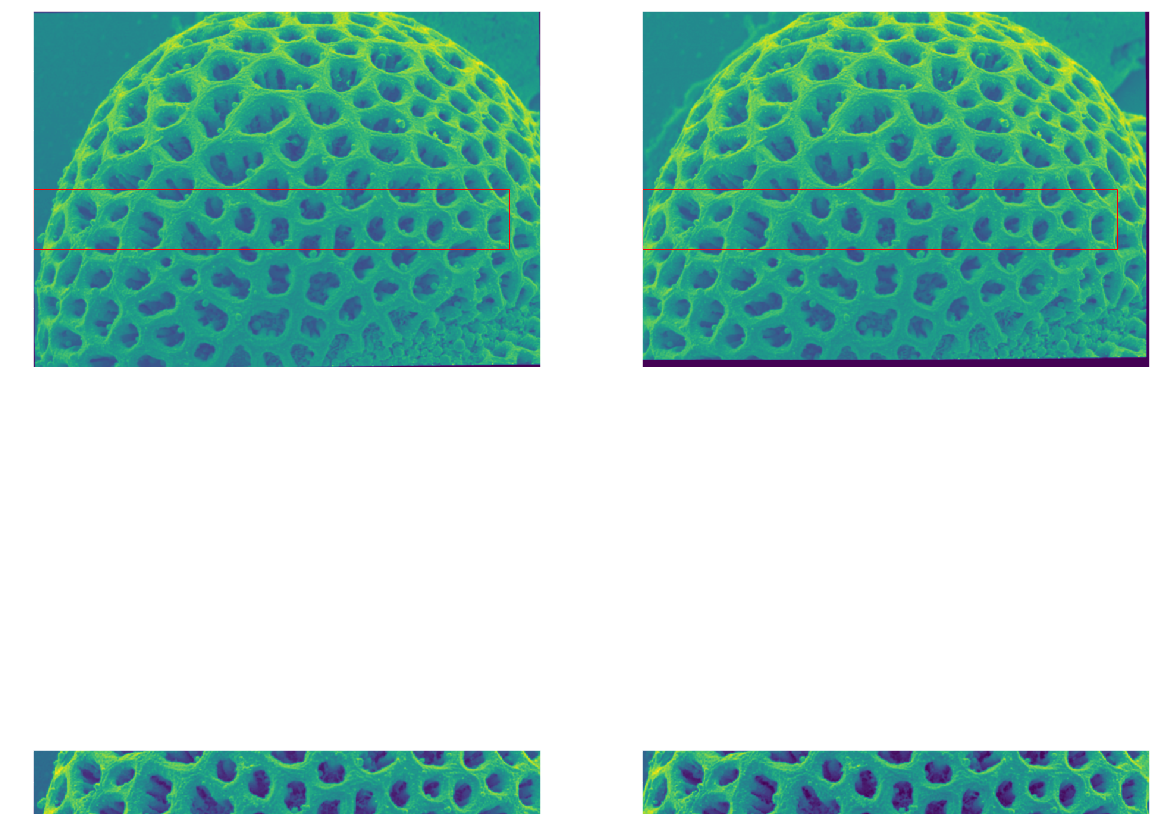

In [3]:
x,y = (0, 300)
w,h = (800, 100)

fig,ax = plt.subplots(2, 2, figsize=(20,20))

ax[0,0].imshow(left)
ax[0,0].add_patch(patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none'))
ax[0,1].imshow(right)
ax[0,1].add_patch(patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none'))

patch_left = left[y:y+h,  x:x+w]
patch_right = right[y:y+h, x:x+w]
ax[1,0].imshow(patch_left)
ax[1,1].imshow(patch_right);

In [4]:
patch_left, patch_right = left, right

	Computing left and right census...	(done in 45.00 s)
	Computing cost volume...	(done in 12.91 s)
	Processing paths east and west...	(done in 36.76 s)
	Processing paths south-east and north-west...	(done in 35.90 s)
	Processing paths south and north...	(done in 35.93 s)
	Processing paths south-west and north-east...	(done in 37.43 s)


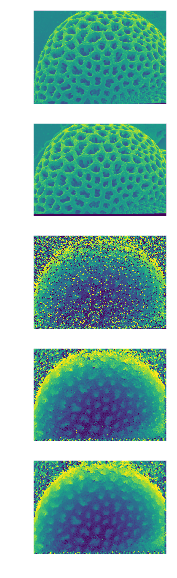

In [6]:
base = 10
winsize = 7
disparity = 20

fig, ax     = plt.subplots(5, figsize=(20, base))
parameters  = Parameters(max_disparity=disparity, P1=5, P2=70, csize=(winsize, winsize), bsize=(3, 3))

### Costs
cost_volume = census_costs(patch_left, patch_right, parameters)
min_disp    = np.argmin(cost_volume, axis=2)
disp_conf   = np.min(cost_volume, axis=2)


### SGM aggregation
paths = Paths()
aggregation_volume = aggregate_costs(cost_volume, parameters, paths)
disparity_map = np.uint8(normalize(select_disparity(aggregation_volume), parameters))
disparity_map_blur = cv2.medianBlur(disparity_map, parameters.bsize[0])

ax[0].imshow(patch_left)
ax[1].imshow(patch_right)
ax[2].imshow(min_disp)
ax[3].imshow(disparity_map)
ax[4].imshow(disparity_map_blur)

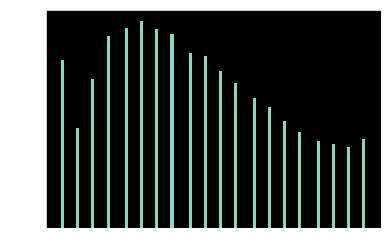

In [7]:
plt.hist(min_disp.flatten(), bins=100);

In [8]:
disp = disparity_map_blur
X = np.repeat(np.arange(disp.shape[1])[None,:], disp.shape[0], axis=0)
Y = np.repeat(np.arange(disp.shape[0])[:,None], disp.shape[1], axis=1)
Z = disp.astype(X.dtype)

msk = np.ones(Z.shape).astype("bool")
coord = np.concatenate([X[msk][None,:], Y[msk][None,:], Z[msk][None,:]])
np.save("../data/Point Clouds/Pollen1", coord)